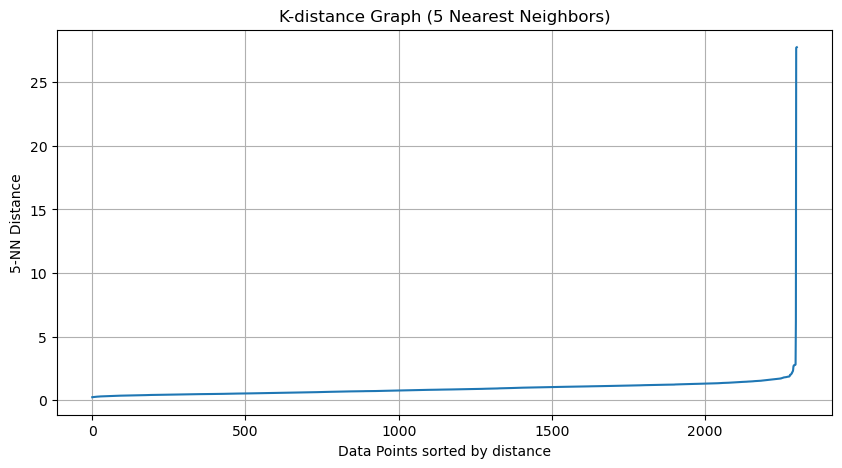

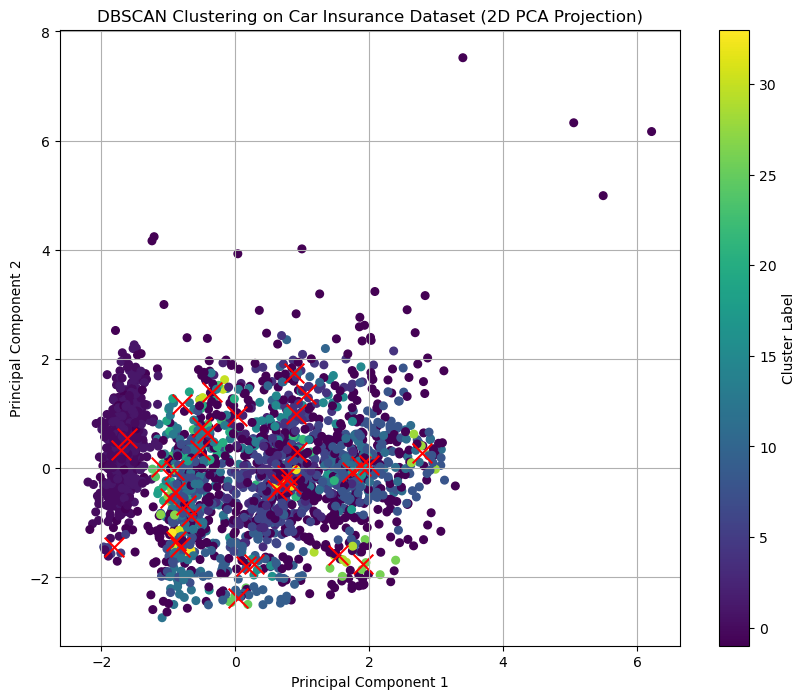

num clusters 34
num noise 627


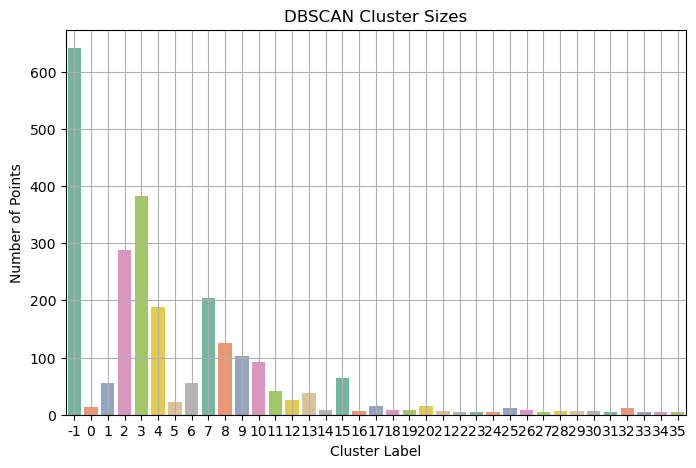

In [5]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Load the uploaded dataset again
file_path = "car_insurance.csv"
df = pd.read_csv(file_path)
df = df.drop(columns=["id"])  # Drop ID column

# Preprocessing
categorical_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
numerical_cols = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 
                  'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop='first'), categorical_cols),
    ("num", StandardScaler(), numerical_cols)
])

X_preprocessed = preprocessor.fit_transform(df)

# PCA Reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

# K-distance graph for eps estimation
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_preprocessed)
distances, indices = neighbors_fit.kneighbors(X_preprocessed)

# Sort and plot k-distances
k_distances = np.sort(distances[:, 4])
plt.figure(figsize=(10, 5))
plt.plot(k_distances)
plt.title('K-distance Graph (5 Nearest Neighbors)')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('5-NN Distance')
plt.grid(True)
plt.show()

# Apply DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5, algorithm='auto')
labels = dbscan.fit_predict(X_preprocessed)

# PCA scatter plot with DBSCAN labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=30)

# Plot cluster centroids manually (mean of points)
unique_labels = set(labels)
for label in unique_labels:
    if label != -1:
        cluster_points = X_pca[labels == label]
        centroid = cluster_points.mean(axis=0)
        plt.scatter(centroid[0], centroid[1], color='red', marker='x', s=200)

plt.colorbar(scatter, label='Cluster Label')
plt.title("DBSCAN Clustering on Car Insurance Dataset (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# Summary Stats
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
num_noise = list(labels).count(-1)


print('num clusters', num_clusters)
print('num noise', num_noise)

#  Cluster count histogram
plt.figure(figsize=(8, 5))
sns.countplot(x=labels_cross, palette='Set2')
plt.title("DBSCAN Cluster Sizes")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Points")
plt.grid(True)
plt.show()

